# Parte 1: Programação em Python

## 1. Limpeza e Análise de Dados de Vendas


### Simulação do dataset

Na ativide é solicitado a simulação de 2023 na parte de python e de 2024 na parte de SQL, porém por ser especificao um período no qual os dados devem constar na primeira parte, e levando em consideração que para 2 anos 50 registros possa ser uma quantidade muito baixa de registros, considerei que fosse um erro de digitação na parte de SQL, e considerei como **junho de 2023**.

In [9]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

categorias = {
    'Notebook': 'Eletrônicos', 'Smartphone': 'Eletrônicos',
    'Cadeira': 'Móveis', 'Mesa': 'Móveis', 'Teclado': 'Acessórios'
}

dados = []
# Gerando 50 registros dentro do ano de 2023
for i in range(1, 51): 
    produto = random.choice(list(categorias.keys()))
    categoria = categorias[produto]
    quantidade = random.randint(1, 5)
    preco = round(random.uniform(100.0, 5000.0), 2)
    
    mes = random.randint(1, 12)
    dia = random.randint(1, 28) 
    data = f"2023-{mes:02d}-{dia:02d}"
    
    dados.append([i, data, produto, categoria, quantidade, preco])

# Criando o DataFrame com as colunas exigidas
df = pd.DataFrame(dados, columns=['ID', 'Data', 'Produto', 'Categoria', 'Quantidade', 'Preço'])

# Inserindo sujeira proposital para demonstrar a etapa de limpeza
df.loc[5, 'Quantidade'] = np.nan 
df = pd.concat([df, df.iloc[[0, 1]]]) 

display(df.head(10))

,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-04-18,Cadeira,Móveis,4.0,4703.98
1,2,2023-04-01,Notebook,Eletrônicos,4.0,1603.27
2,3,2023-09-04,Smartphone,Eletrônicos,2.0,3582.50
3,4,2023-02-17,Cadeira,Móveis,3.0,4377.81
4,5,2023-07-08,Notebook,Eletrônicos,4.0,3297.56
5,6,2023-04-14,Notebook,Eletrônicos,NaN,4162.97
6,7,2023-09-28,Cadeira,Móveis,5.0,652.81
7,8,2023-01-13,Mesa,Móveis,3.0,1010.76
8,9,2023-05-02,Notebook,Eletrônicos,4.0,608.95
9,10,2023-02-06,Cadeira,Móveis,3.0,1861.71


### Limpeza dos Dados e Criação do CSV

Como dataset gerado contém inconsistências inseridas de forma proposital. Agora é feito o tratamento de valores faltantes preenchendo as lacunas, remoção das linhas duplicadas e conversão dos tipos de dados para os formatos adequados. E no final é exportado para o arquivo `data_clean.csv`.

In [10]:
# Tratamento de valores faltantes (preenchendo os vazios com 1)
df['Quantidade'] = df['Quantidade'].fillna(1) 

# Remoção de duplicatas
df = df.drop_duplicates() 

# Conversão de tipos de dados
df['Data'] = pd.to_datetime(df['Data']) 
df['Quantidade'] = df['Quantidade'].astype(int)

# Mostrando o Resultado
display(df.head(10))

# Salva o dataset limpo no formato CSV
df.to_csv('data_clean.csv', index=False) 
print("Dados limpos e salvos com sucesso no arquivo 'data_clean.csv'!")


,ID,Data,Produto,Categoria,Quantidade,Preço
0,1,2023-04-18,Cadeira,Móveis,4,4703.98
1,2,2023-04-01,Notebook,Eletrônicos,4,1603.27
2,3,2023-09-04,Smartphone,Eletrônicos,2,3582.50
3,4,2023-02-17,Cadeira,Móveis,3,4377.81
4,5,2023-07-08,Notebook,Eletrônicos,4,3297.56
5,6,2023-04-14,Notebook,Eletrônicos,1,4162.97
6,7,2023-09-28,Cadeira,Móveis,5,652.81
7,8,2023-01-13,Mesa,Móveis,3,1010.76
8,9,2023-05-02,Notebook,Eletrônicos,4,608.95
9,10,2023-02-06,Cadeira,Móveis,3,1861.71


Dados limpos e salvos com sucesso no arquivo 'data_clean.csv'!


### Fazendo as Análises no dataset

No dataset tratado, agora é calculado o total de vendas por produto (Quantidade * Preço), identificando o item com maior número de vendas.

In [11]:
# Cálculo do total de vendas
df['Total_Venda'] = df['Quantidade'] * df['Preço'] 

# Identificação do produto com maior número de vendas totais
vendas_por_produto = df.groupby('Produto')['Total_Venda'].sum().reset_index()
indice_maior_venda = vendas_por_produto['Total_Venda'].idxmax()
produto_topo = vendas_por_produto.loc[indice_maior_venda]

# Mostrando as vendas totais por produtos
display(vendas_por_produto)

print(f"O produto com maior número de vendas totais foi: {produto_topo['Produto']} (R$ {produto_topo['Total_Venda']:.2f})") 

,Produto,Total_Venda
0,Cadeira,108819.24
1,Mesa,117444.67
2,Notebook,80753.93
3,Smartphone,46001.51
4,Teclado,42108.43


O produto com maior número de vendas totais foi: Mesa (R$ 117444.67)


## 2. Análise Exploratória e Gráficos

Agora com base nos cálculos feitos e no dataset tratado, é gerado um gráfico de linhas para analisar a tendência das vendas mensalmente ao longo do período.

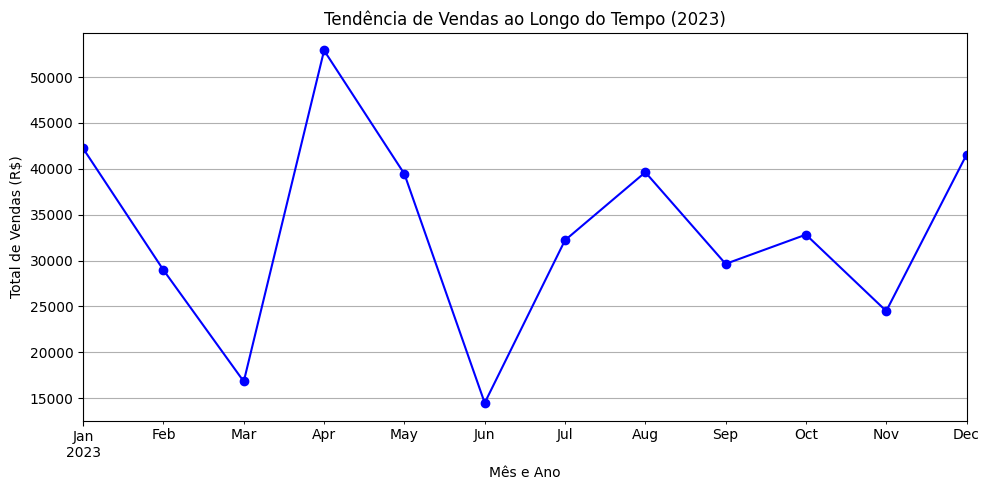

In [12]:
# Gráfico de linha da tendência de vendas ao longo do tempo analisando mensalmente
df['Mes_Ano'] = df['Data'].dt.to_period('M')
vendas_mensais = df.groupby('Mes_Ano')['Total_Venda'].sum()

vendas_mensais.plot(kind='line', marker='o', color='b', figsize=(10, 5))
plt.title('Tendência de Vendas ao Longo do Tempo (2023)')
plt.xlabel('Mês e Ano')
plt.ylabel('Total de Vendas (R$)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Parte 2: Consultas SQL

Para fins de demonstração nesta apresentação, as queries abaixo são executadas diretamente no Python utilizando a biblioteca nativa `sqlite3`.

In [13]:
import sqlite3

# Criando banco de dados na memória
conn = sqlite3.connect(':memory:')

# Removendo a coluna 'Mes_Ano' apenas na hora de enviar pro SQL
df_para_sql = df.drop(columns=['Mes_Ano'])
df_para_sql.to_sql('vendas', conn, index=False)

print("--- Consulta 1: Nome do produto, categoria e soma total de vendas (ordem decrescente) ---") 
query1 = """
SELECT Produto, Categoria, SUM(Quantidade * Preço) AS Total_Vendas
FROM vendas
GROUP BY Produto, Categoria
ORDER BY Total_Vendas DESC;
"""
resultado1 = pd.read_sql_query(query1, conn)
display(resultado1)


print("\n--- Consulta 2: Produtos que venderam menos no mês de junho de 2023 ---") 
query2 = """
SELECT Produto, SUM(Quantidade) AS Total_Itens_Vendidos
FROM vendas
WHERE Data >= '2023-06-01' AND Data <= '2023-06-30'
GROUP BY Produto
ORDER BY Total_Itens_Vendidos ASC;
"""
resultado2 = pd.read_sql_query(query2, conn)
display(resultado2)

--- Consulta 1: Nome do produto, categoria e soma total de vendas (ordem decrescente) ---


,Produto,Categoria,Total_Vendas
0,Mesa,Móveis,117444.67
1,Cadeira,Móveis,108819.24
2,Notebook,Eletrônicos,80753.93
3,Smartphone,Eletrônicos,46001.51
4,Teclado,Acessórios,42108.43



--- Consulta 2: Produtos que venderam menos no mês de junho de 2023 ---


,Produto,Total_Itens_Vendidos
0,Teclado,10


# Criação dos outros aruivos solicitados diretamente por aqui

Para caso seja realizado outras simulações, ele gere os arquivos novamente

In [14]:

conteudo_sql = """/* Parte 2: SQL
Explicação da lógica:
- Na Consulta 1, usamos SUM para calcular o total e GROUP BY para agrupar por Produto e Categoria, ordenando do maior para o menor (DESC).
- Na Consulta 2, filtramos (WHERE) o período de junho de 2023 e ordenamos do menor para o maior (ASC) para achar os piores em vendas.
- Premissa: O mês de junho de 2024 foi ajustado para 2023 para manter consistência com a simulação.
*/

-- 1. Nome do produto, categoria e soma total de vendas.
SELECT 
    Produto, 
    Categoria, 
    SUM(Quantidade * Preço) AS Total_Vendas
FROM 
    vendas
GROUP BY 
    Produto, 
    Categoria
ORDER BY 
    Total_Vendas DESC;

-- 2. Produtos que venderam menos no mês de junho de 2023.
SELECT 
    Produto, 
    SUM(Quantidade) AS Total_Itens_Vendidos
FROM 
    vendas
WHERE 
    Data >= '2023-06-01' AND Data <= '2023-06-30'
GROUP BY 
    Produto
ORDER BY 
    Total_Itens_Vendidos ASC;
"""

with open('consultas_sql.sql', 'w', encoding='utf-8') as arquivo_sql:
    arquivo_sql.write(conteudo_sql)

print("\nArquivo 'consultas_sql.sql' criado e salvo com sucesso na sua pasta!")


Arquivo 'consultas_sql.sql' criado e salvo com sucesso na sua pasta!


In [15]:
# --- GERANDO O RELATÓRIO DE INSIGHTS DINÂMICO ---

# Puxando os nomes exatos dos produtos que ganharam e perderam na sua simulação
nome_produto_campeao = produto_topo['Produto']
nome_pior_junho = resultado2.iloc[0]['Produto'] # Pega o primeiro da lista de junho (o que vendeu menos)

conteudo_md = f"""# Relatório de Insights - Teste Analytics Quod

Com base nas análises realizadas nas Partes 1 e 2, destacamos os seguintes insights e planos de ação:

## 1. Concentração de Faturamento
**Insight:** A análise agregada revelou que o produto **{nome_produto_campeao}** liderou o volume total de vendas financeiras no ano de 2023. Em contrapartida, recortes específicos mostraram baixa adesão de outros itens; em junho de 2023, por exemplo, o item **{nome_pior_junho}** apresentou o menor volume de saída.
**Ação Sugerida:** Recomenda-se direcionar maior orçamento de marketing para o {nome_produto_campeao}, aproveitando sua tração natural. Para o {nome_pior_junho}, sugere-se uma revisão na estratégia de preços ou a criação de combos ("cross-selling") junto aos itens mais vendidos para movimentar o estoque parado.

## 2. Sazonalidade e Tendência Temporal
**Insight:** O gráfico de linha da tendência mensal demonstra oscilações consistentes no faturamento ao longo de 2023, evidenciando que a demanda possui picos e vales bem definidos ao longo do ano.
**Ação Sugerida:** A equipe de cadeia de suprimentos (Supply Chain) deve utilizar o mapeamento desses ciclos históricos para otimizar a reposição de estoque. Além disso, a área comercial pode antecipar campanhas de descontos ou promoções agressivas nos meses de baixa histórica para estabilizar a curva de receita.
"""

with open('relatorio_insights.md', 'w', encoding='utf-8') as arquivo_md:
    arquivo_md.write(conteudo_md)

print("Arquivo 'relatorio_insights.md' criado dinamicamente com os seus resultados reais!")

Arquivo 'relatorio_insights.md' criado dinamicamente com os seus resultados reais!
